In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load the Excel file
df = pd.read_excel('data.xlsx')

In [104]:
df

,#,Project name,Country,Start,End,Technology,H - Power,H - Grids,H - Mobility,H - Industry,H - CHP,H - Chemicals,M - Grids,M - Mobility,L - Mobility,MWel,nm³ H₂/hour,Tonne CO₂ captures/yr,IEA estimated normalized capacity [nm³ H₂/hour]
0,84,PVFCSYS Sophia Antipolis,France,2000.0,2004.0,ALK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0036,0.7,NaN,0.700000
1,38,Grimstad Renewable Energy Park,Norway,2000.0,NaN,ALK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0500,10.0,NaN,10.000000
2,31,FIRST - Showcase II,Spain,2000.0,2004.0,PEM,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0010,0.2,NaN,0.200000
3,68,Laboratory Plant HRI Quebec,Canada,2001.0,NaN,ALK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0050,1.0,NaN,1.000000
4,18,Bio SNG Güssing,Austria,2002.0,2009.0,Unknown PtX,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
311,255,Submarines,United Kingdom,NaN,NaN,PEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
312,261,Submarines,United States,NaN,NaN,PEM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
313,284,HyNetherlands,Netherlands,NaN,NaN,Unknown PtX,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0000,NaN,NaN,22222.222222
314,285,Drax Humber cluster,United Kingdom,NaN,NaN,Fossil,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
# Prepare data for the first plot: Horizontal bar plot grouped by technology
country_tech_counts = df.groupby(['Country', 'Technology']).size().reset_index(name='Project Count')

In [107]:
country_tech_counts

,Country,Technology,Project Count
0,Argentina,ALK,1
1,Argentina,Unknown PtX,1
2,Australia,ALK,1
3,Australia,Fossil,2
4,Australia,PEM,6
...,...,...,...
89,United States,ALK,4
90,United States,Fossil,5
91,United States,PEM,9
92,United States,SOEC,3


In [108]:
# Prepare data for the second plot: Bar plot by technology
tech_counts = df['Technology'].value_counts().reset_index()
tech_counts.columns = ['Technology', 'Project Count']

In [109]:
tech_counts

,Technology,Project Count
0,PEM,114
1,ALK,102
2,Unknown PtX,59
3,Fossil,23
4,SOEC,17


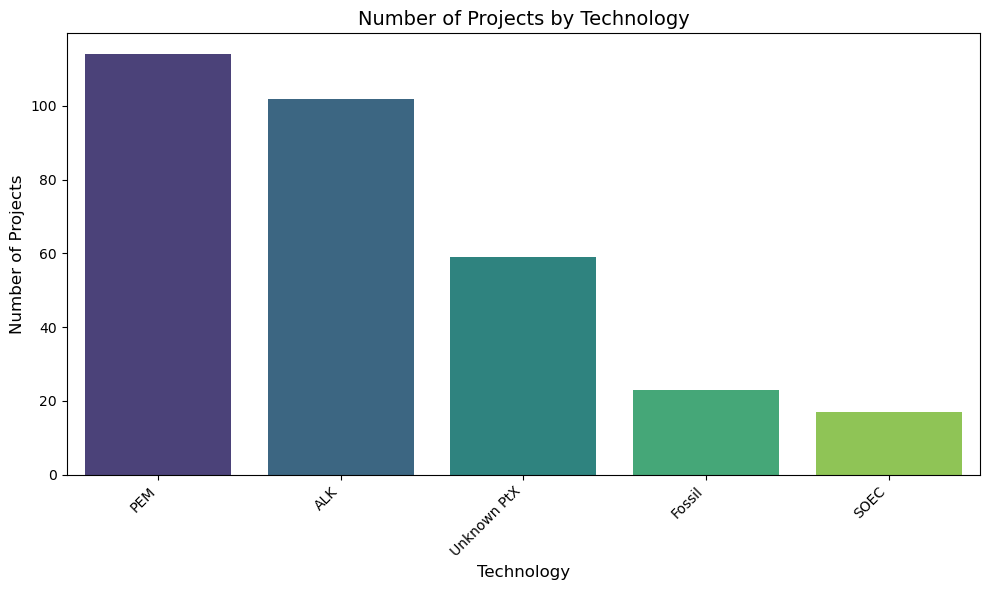

In [130]:
# Create the bar plot for projects by technology
plt.figure(figsize=(10, 6))
sns.barplot(data=tech_counts, x='Technology', y='Project Count', palette='viridis')
plt.title('Number of Projects by Technology', fontsize=14)
plt.xlabel('Technology', fontsize=12)
plt.ylabel('Number of Projects', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('project_counts_by_technology.png', dpi=300)  # Replace filename if needed
plt.show()

In [117]:
top_countries = df['Country'].value_counts().head(10).index

In [118]:
top_countries

Index(['Germany', 'United States', 'France', 'Denmark', 'United Kingdom',
       'Japan', 'Netherlands', 'Australia', 'Canada', 'Austria'],
      dtype='object')

In [127]:
filtered_country_tech_counts = country_tech_counts[country_tech_counts['Country'].isin(top_countries)]

In [128]:
filtered_country_tech_counts

,Country,Technology,Project Count
2,Australia,ALK,1
3,Australia,Fossil,2
4,Australia,PEM,6
5,Australia,Unknown PtX,4
6,Austria,ALK,1
7,Austria,PEM,7
8,Austria,Unknown PtX,3
11,Canada,ALK,6
12,Canada,Fossil,3
13,Canada,PEM,3


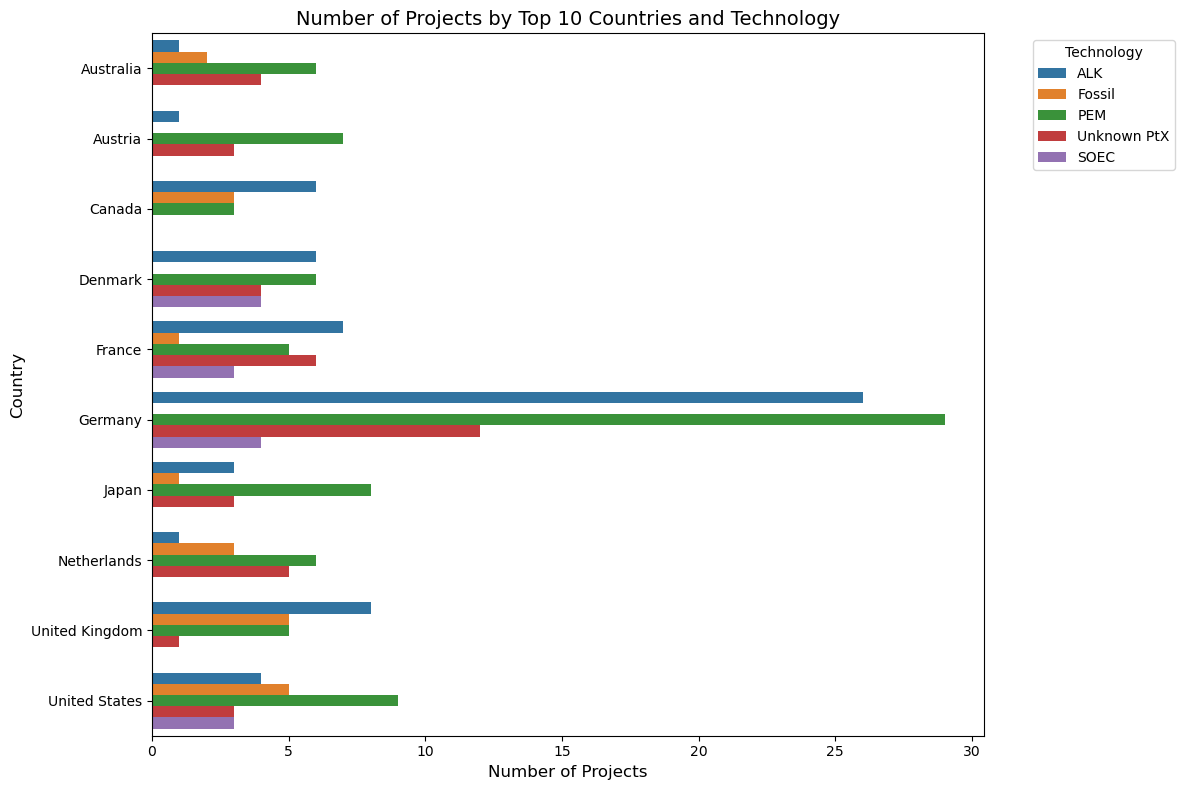

In [131]:
# Create the horizontal bar plot for the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(data=filtered_country_tech_counts, y='Country', x='Project Count', hue='Technology', dodge=True)
plt.title('Number of Projects by Top 10 Countries and Technology', fontsize=14)
plt.xlabel('Number of Projects', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Technology', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('Number of Projects by Top 10 Countries and Technology.png', dpi=300)  # Replace filename if needed

plt.show()